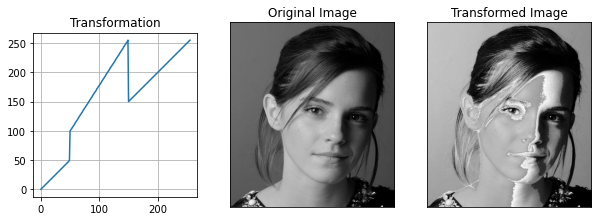

In [1]:
#Q1)

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("emma_gray.jpg")
assert img is not None

t1 = np.linspace(0, 50, 50)
t2 = np.linspace(50, 100, 0)
t3 = np.linspace(100, 255, 100)
t4 = np.linspace(255, 150, 0)
t5 = np.linspace(150, 255, 106)

transform = np.concatenate((t1,t3,t5,t2,t4), axis = 0).astype(np.uint8)
transformed_img = cv.LUT(img, transform)

fig,ax = plt.subplots(1,3, figsize = (10,10))
ax[0].plot(transform)
ax[0].set_aspect('equal')
ax[0].set_title('Transformation')
ax[0].grid(True)

ax[1].imshow(img, cmap = "gray", vmin = 0, vmax = 255)
ax[1].set_aspect('equal')
ax[1].set_title('Original Image')
ax[1].set_xticks([])
ax[1].set_yticks([])


ax[2].imshow(transformed_img, cmap = "gray", vmin = 0, vmax = 255)
ax[2].set_aspect('equal')
ax[2].set_title('Transformed Image')
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()


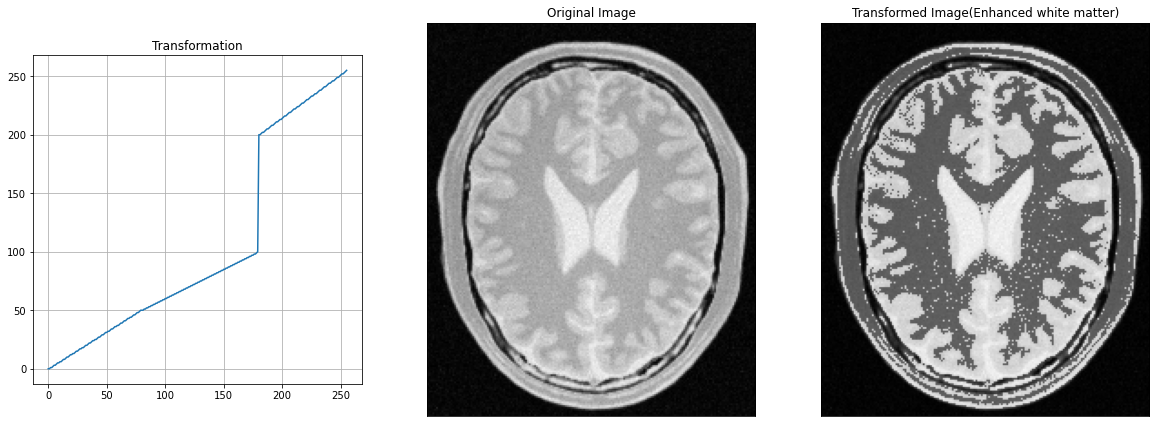

In [56]:
#Q2) a)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("brain_proton_density_slice.png")
assert img is not None

t1 = np.linspace(0, 50, 80)
t2 = np.linspace(50, 100, 100)
t3 = np.linspace(200, 255, 76)

transform_white = np.concatenate((t1,t2, t3), axis = 0).astype(np.uint8)
transformed_img1 = cv.LUT(img, transform_white)


fig,ax = plt.subplots(1,3, figsize = (20,20))
ax[0].plot(transform_white)
ax[0].grid(True)
ax[0].set_aspect('equal')
ax[0].set_title('Transformation')

ax[1].imshow(img, cmap = "gray", vmin = 0, vmax = 255)
ax[1].set_title('Original Image')
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(transformed_img1, cmap = "gray", vmin = 0, vmax = 255)
ax[2].set_title('Transformed Image(Enhanced white matter)')
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()


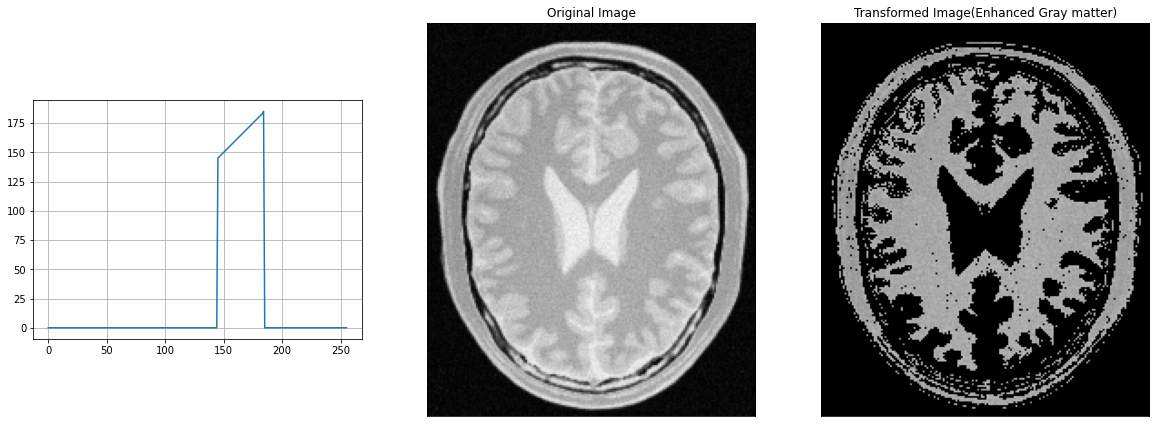

In [53]:
#Q2) b)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("brain_proton_density_slice.png")
assert img is not None

t1 = np.linspace(0, 0, 145)
t2 = np.linspace(0, 145, 0)
t3 = np.linspace(145, 185, 40)
t4 = np.linspace(185, 0, 0)
t5 = np.linspace(0, 0, 71)

transform = np.concatenate((t1,t2,t3,t4,t5), axis = 0).astype(np.uint8)
transformed_img = cv.LUT(img, transform)


fig,ax = plt.subplots(1,3, figsize = (20,20))
ax[0].plot(transform)
ax[0].set_aspect('equal')
ax[0].grid(True)

ax[1].imshow(img, cmap = "gray", vmin = 0, vmax = 255)
ax[1].set_title('Original Image')
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(transformed_img, cmap = "gray", vmin = 0, vmax = 255)
ax[2].set_title('Transformed Image(Enhanced Gray matter)')
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.show()

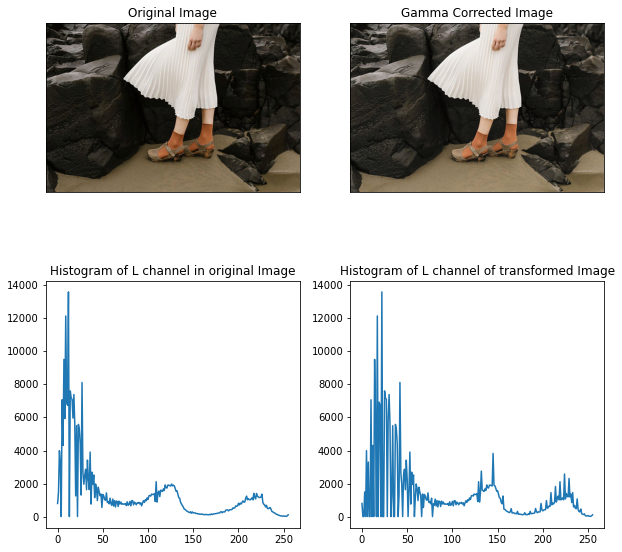

In [4]:
#Q3)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

img = cv.imread("highlights_and_shadows.jpg")
assert img is not None
img_Lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
(L, a, b) = cv.split(img_Lab)

gamma = 0.8
t= np.array([(p/255) ** gamma * 255 for p in range(0,256)]).astype('uint8')
image_transformed = cv.LUT(L , t)

merged = cv.merge([image_transformed, a, b])


gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(10,10))
ax = plt.subplot(gs[0, 0]) 
ax.set_title('Original Image')
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(cv.cvtColor(img_Lab, cv.COLOR_Lab2RGB))

ax = plt.subplot(gs[0, 1]) 
ax.set_title('Gamma Corrected Image')
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(cv.cvtColor(merged, cv.COLOR_Lab2RGB))

hist_L = cv.calcHist([L], [0], None, [256], [0,256])
ax = plt.subplot(gs[1, 0]) 
ax.set_title('Histogram of L channel in original Image')
plt.plot(hist_L)

hist_L_t = cv.calcHist([image_transformed], [0], None, [256], [0,256])
ax = plt.subplot(gs[1, 1]) 
ax.set_title('Histogram of L channel of transformed Image')
plt.plot(hist_L_t)
plt.show()



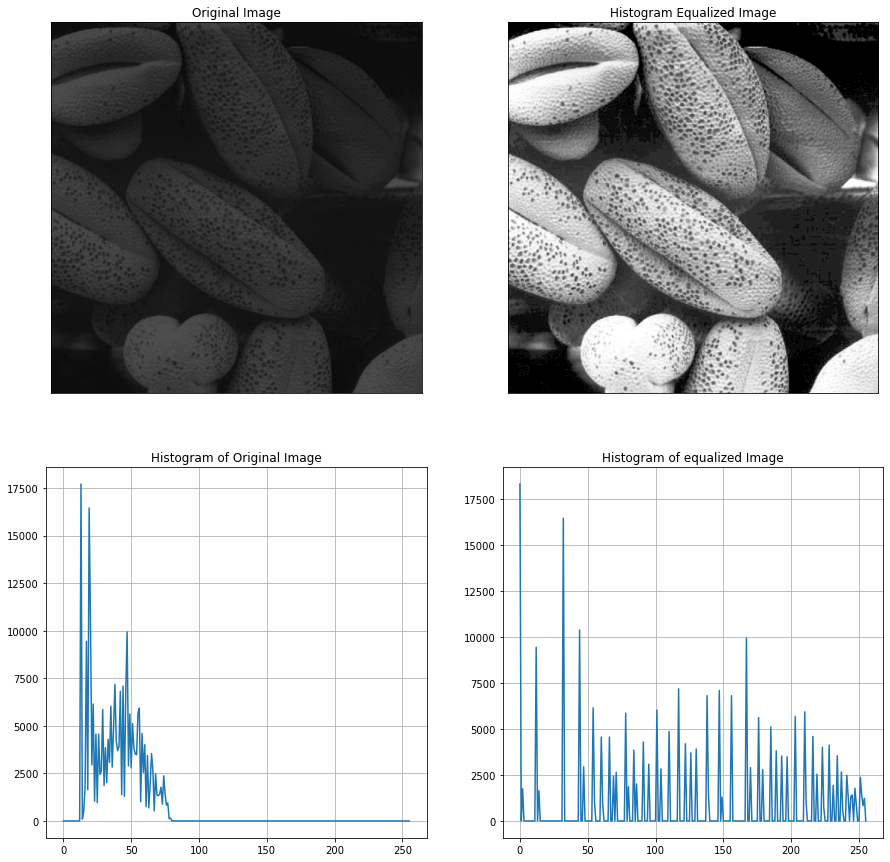

In [5]:
#Q4)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

img = cv.imread("shells.png", cv.IMREAD_GRAYSCALE)
assert img is not None




def hist_eq(img: np.ndarray):
    histOrig, bins = np.histogram(img.flatten(), 256, [0, 255])
    cdf = histOrig.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0)
    imgEq = cdf[img.astype('uint8')]
    histEq, bins2 = np.histogram(imgEq.flatten(), 256, [0, 256])

    return imgEq, histOrig, histEq



equalized_img, original_hist, equalized_hist = hist_eq(img) 

fig,ax = plt.subplots(2,2, figsize = (15,15))

ax[0][1].imshow(equalized_img, cmap = "gray", vmin = 0, vmax = 255)
ax[0][1].set_title('Histogram Equalized Image')
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

ax[0][0].imshow(img, cmap = "gray", vmin = 0, vmax = 255)
ax[0][0].set_title('Original Image')
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])


ax[1][0].plot(original_hist)
ax[1][0].set_title('Histogram of Original Image')
ax[1][0].grid(True)

ax[1][1].plot(equalized_hist)
ax[1][1].set_title('Histogram of equalized Image')
ax[1][1].grid(True)

plt.show()


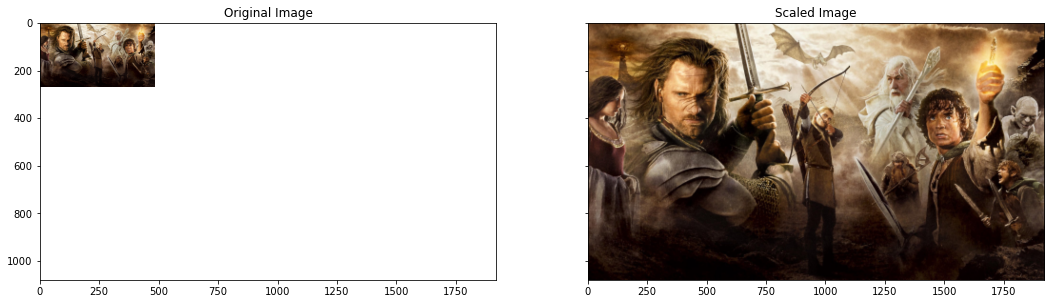

In [4]:
 #Q5) #Nearest Neighbour
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def zoom(image, scale):

    rows = int(scale*image.shape[0])
    cols = int(scale*image.shape[1])

    zoomed = np.zeros((rows,cols,3),dtype=img.dtype)

    for i in range(0,rows):
        for j in range(0,cols):
            for k in range(0,3):
                zoomed[i,j,k] = image[int(i/scale),int(j/scale),k]

    return zoomed




img  = cv.imread("a1q5images/im01small.png")
assert img is not None


zoomed_img = zoom(img, 4)

fig,ax = plt.subplots(1,2, figsize = (18,18),sharex=True, sharey=True)
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(zoomed_img, cv.COLOR_BGR2RGB))
ax[1].set_title('Scaled Image')


plt.show()


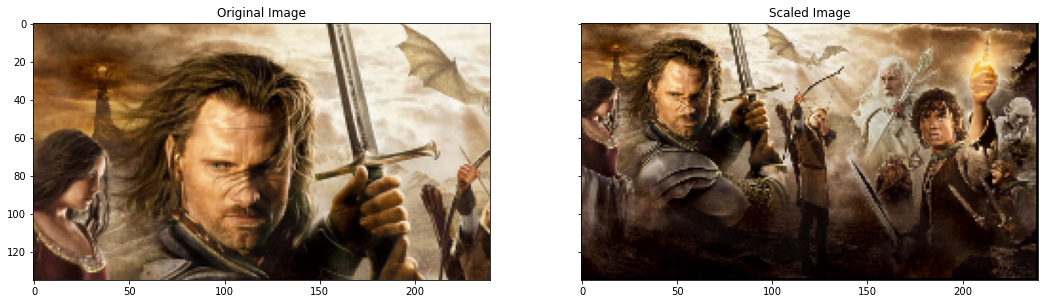

In [2]:
 #Q5) #Bilinear Interpolation

import math
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def zoom(img,scale):       
    rows = int(scale*img.shape[0])
    cols = int(scale*img.shape[1])
    zoomed = np.zeros((rows,cols,3),dtype=img.dtype)


    if scale > 1:
        gap = math.floor(scale)
    else:
        gap = 1
        
    for i in range(0,rows-gap):
        for j in range(0,cols-gap):
            for k in range(0,3):
                x = i/scale - math.floor(i/scale)
                y = j/scale - math.floor(j/scale)
                tl = img[math.floor(i/scale),math.floor(j/scale),k]
                bl = img[math.floor(i/scale),math.ceil(j/scale),k]
                tr = img[math.ceil(i/scale),math.floor(j/scale),k]
                br = img[math.ceil(i/scale),math.ceil(j/scale),k]
                avg_pix = int((br*(1-x)+bl*(x))*(1-y)+(tr*(1-x)+tl*(x))*(y))
                zoomed[i,j,k] = avg_pix

    return zoomed


img = cv.imread("a1q5images\im01small.png")
zoomed_img = zoom(img,0.5)

fig,ax = plt.subplots(1,2, figsize = (18,18),sharex=True, sharey=True)
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(zoomed_img, cv.COLOR_BGR2RGB))
ax[1].set_title('Scaled Image')

plt.show()



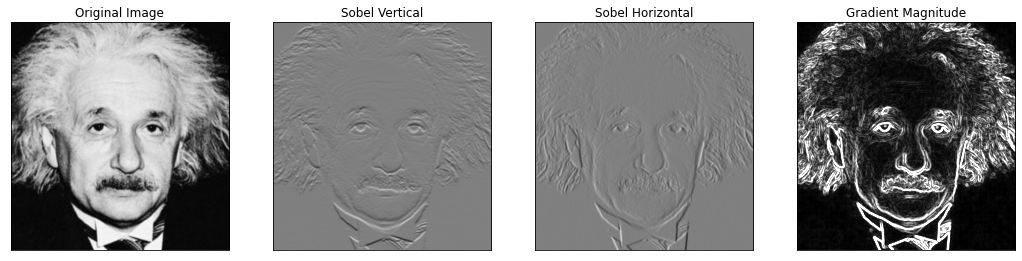

In [3]:
#Q6) a)

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

img = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

#Sobel vertical
kernel_v = np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype = 'float')
imgc_v = cv.filter2D(img, -1, kernel_v)

#Sobel Horizontal
kernel_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype = 'float')
imgc_h = cv.filter2D(img, -1, kernel_h)

#gradient Magnitude
grad_mag = np.sqrt(imgc_v ** 2 + imgc_h ** 2)

fig,ax = plt.subplots(1, 4, figsize = (18,18) )

ax[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].imshow(imgc_v , cmap = 'gray', vmin = -1020, vmax = 1020)
ax[2].imshow(imgc_h , cmap = 'gray', vmin = -1020, vmax = 1020)
ax[3].imshow(grad_mag , cmap = 'gray', vmin = 0, vmax = 255)

ax[0].set_title("Original Image")
ax[1].set_title("Sobel Vertical")
ax[2].set_title("Sobel Horizontal")
ax[3].set_title("Gradient Magnitude")

ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].set_xticks([]), ax[2].set_yticks([])
ax[3].set_xticks([]), ax[3].set_yticks([])


plt.show()

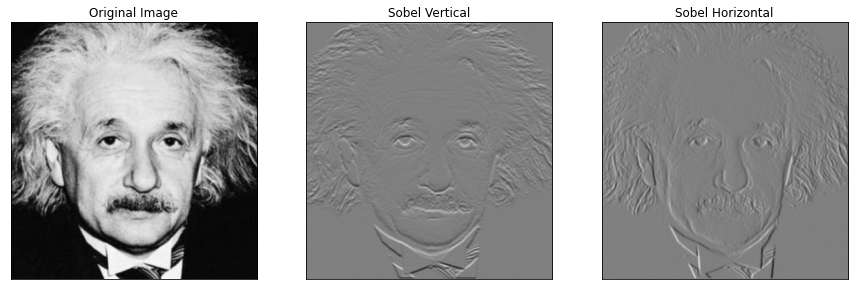

In [5]:
#Q6) b)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def convolve(img, kernel):
    img_h = img.shape[0]
    img_w = img.shape[1]

    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]

    h = kernel_h // 2
    w = kernel_w // 2

    img_conv = np.zeros((img.shape[0], img.shape[1]))

    for i in range(h, img_h - h):
        for j in range(w, img_w - w):
            sum = 0
            for m in range(kernel_h):
                for n in range(kernel_w):
                    sum += kernel[m][n] * img[i-h+m][j-w+n] 
            img_conv[i][j] = sum

    return img_conv

def sobel(img, kernel):
    img_h = img.shape[0]
    img_w = img.shape[1]

    img_padded = np.zeros((img_h+2, img_w+2))
    rows = img_padded.shape[0]
    cols = img_padded.shape[1]

    for i in range(img_h):
        for j in range(img_w):
            img_padded[i+1][j+1] = img[i][j] 

    img_sobel = convolve(img_padded , kernel)
    return img_sobel


#sobel_horizontal
kernel_h =np.array([[-1,0,1],
            [-2,0,2],
            [-1,0,1]])

#sobel_vertical
kernel_v = np.array([[-1,-2,-1],
            [0,0,0],
            [1,2,1]])




img = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float64)
assert img is not None

fig,ax =plt.subplots(1,3, figsize = (15,15))
img_sobel_h = sobel(img, kernel_h)
img_sobel_v = sobel(img, kernel_v)

ax[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].imshow(img_sobel_v , cmap = 'gray', vmin = -1020, vmax = 1020)
ax[2].imshow(img_sobel_h , cmap = 'gray', vmin = -1020, vmax = 1020)

ax[0].set_title("Original Image")
ax[1].set_title("Sobel Vertical")
ax[2].set_title("Sobel Horizontal")


ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].set_xticks([]), ax[2].set_yticks([])




plt.show()


In [ ]:
#Q6) c)

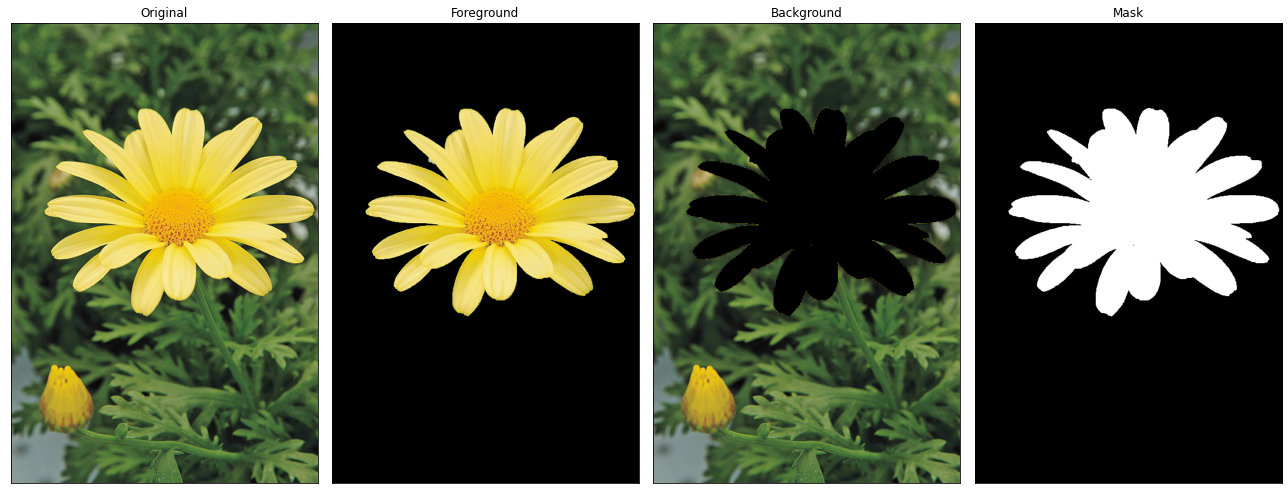

In [278]:
#Q7) a)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

img = cv.imread("daisy.jpg")
assert img is not None

mask = np.zeros(img.shape[:2],np.uint8)

bgModel = np.zeros([1,65],np.float64)
fgModel = np.zeros([1,65],np.float64)

rect = (50,150,520,400)

cv.grabCut(img,mask,rect,bgModel,fgModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2) | (mask==0) , 0,1).astype('uint8')
mask3 = np.where((mask==1) | (mask==3) , 0,1).astype('uint8')

imgcut = img * mask2[:,:,np.newaxis]
imgBgd = img * mask3[:,:,np.newaxis]


fig,ax = plt.subplots(1,4,sharex='all',sharey='all',figsize=(18,18))

ax[0].imshow(cv.cvtColor(img,cv2.COLOR_BGR2RGB))
ax[0].set_title("Original")

ax[1].imshow(cv.cvtColor(imgcut,cv2.COLOR_BGR2RGB))
ax[1].set_title("Foreground")

ax[2].imshow(cv.cvtColor(imgBgd,cv2.COLOR_BGR2RGB))
ax[2].set_title("Background")

ax[3].imshow(mask2 , cmap = 'gray')
ax[3].set_title("Mask")

ax[0].set_xticks([]),ax[0].set_yticks([])
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].set_xticks([]), ax[2].set_yticks([])
ax[3].set_xticks([]), ax[3].set_yticks([])

plt.show()

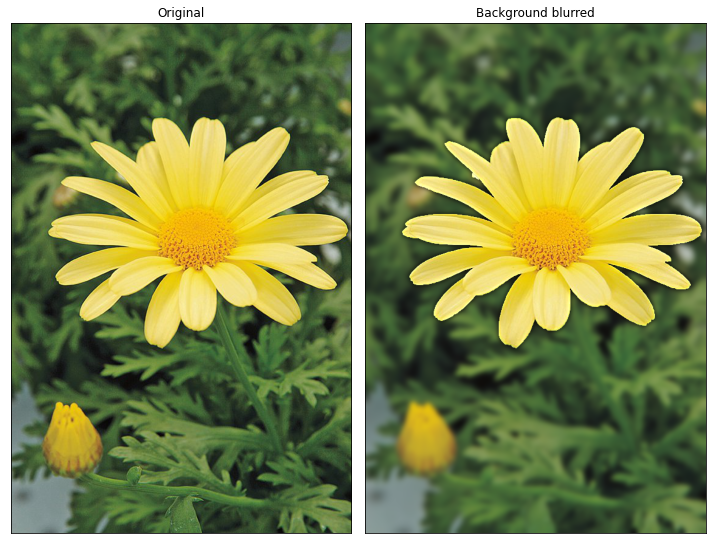

In [299]:
#Q7) b)

background = imgBgd
blurred = cv.GaussianBlur( background, (25,25) , 0)


final_img = cv2.add(imgcut, blurred)



fig,ax = plt.subplots(1,2, figsize = (10,10))

ax[0].imshow(cv.cvtColor(img,cv2.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(final_img,cv2.COLOR_BGR2RGB))

ax[0].set_title("Original")
ax[1].set_title("Background blurred")

ax[0].set_xticks([]),ax[0].set_yticks([])
ax[1].set_xticks([]), ax[1].set_yticks([])

plt.show()
